# Solutions to the Assignment Questions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing_df = pd.read_csv('housing.csv')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### EDA

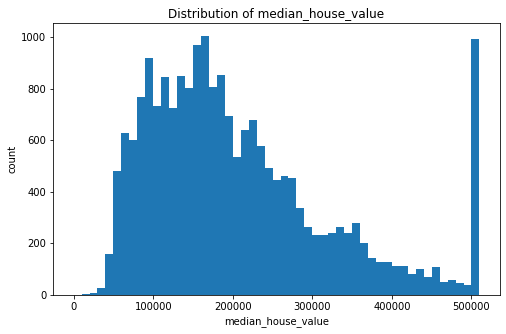

In [3]:
bins = np.arange(0, housing_df.median_house_value.max()+10000, 10000)

plt.figure(figsize=[8, 5])
plt.hist(data = housing_df, x = 'median_house_value', bins = bins)
plt.xlabel('median_house_value')
plt.ylabel('count');
plt.title('Distribution of median_house_value');

From the histogram above, the distribution of the median_house_value column has a long tail.

In [4]:
### Features

In [5]:
housing_df = housing_df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
                         'households', 'median_income', 'median_house_value']]
housing_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [6]:
housing_df.shape

(20640, 9)

# Question 1
Find a feature with missing values. How many missing values does it have?

In [7]:
housing_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

total_bedrooms        207

# Question 2
What's the median (50% percentile) for variable population?

In [8]:
housing_df.population.median()

1166.0

50%       1166.000000

- Split the data
- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [9]:
#split the data
n = len(housing_df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [10]:
n_val, n_test, n_train

(4128, 4128, 12384)

In [11]:
df_train = housing_df.iloc[n_train:]
df_val = housing_df.iloc[n_train:n_train+n_val]
df_test = housing_df.iloc[n_train+n_val:]

In [12]:
#Shuffle the initial dataset, use seed 42.
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [13]:
df_train = housing_df.iloc[idx[:n_train]]
df_val = housing_df.iloc[idx[n_train:n_train+n_val]]
df_test = housing_df.iloc[idx[n_train+n_val:]]

In [14]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [15]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [18]:
#Make sure that the target value ('median_house_value') is not in your dataframe.
#Apply the log transformation to the median_house_value variable using the np.log1p() function.
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [19]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [20]:
len(y_train)

12384

# Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

### Filling missing values with 0

In [21]:
#fill missing values with 0
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [22]:
df_train_0 = df_train.copy()
df_train_0.fillna(0, inplace = True)
df_train_0.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [23]:
#training df_train_0 with linear regression not regularized.
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [24]:
df_train_0 = df_train_0.values

In [25]:
w0, w = train_linear_regression(df_train_0, y_train)

In [26]:
y_pred = w0 + df_train_0.dot(w)

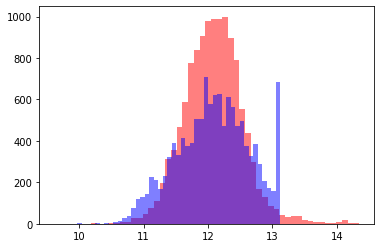

In [27]:
#import seaborn as sns
plt.hist(y_pred, color = 'red', bins = 50, alpha = 0.5);
plt.hist(y_train, color = 'blue', bins = 50, alpha = 0.5);

### Validating with RMSE

In [28]:
#rmse
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [29]:
rmse(y_train, y_pred)

0.34131359101566766

In [30]:
round(rmse(y_train, y_pred), 2)

0.34

### Filling missing values with mean

In [31]:
m = df_train.total_bedrooms.mean()
m

533.4803317730147

In [32]:
df_train_mean = df_train.copy()
df_train_mean.fillna(m, inplace = True)

In [33]:
df_train_mean.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [34]:
df_train_mean = df_train_mean.values

In [35]:
w0, w = train_linear_regression(df_train_mean, y_train)

In [36]:
y_pred = w0 + df_train_mean.dot(w)

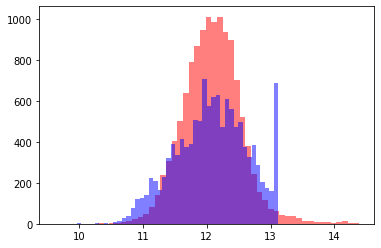

In [37]:
plt.hist(y_pred, color = 'red', bins = 50, alpha = 0.5);
plt.hist(y_train, color = 'blue', bins = 50, alpha = 0.5);

### Validating with RMSE

In [38]:
rmse(y_train, y_pred)

0.3410416181032807

In [39]:
round(rmse(y_train, y_pred), 2)

0.34

Filling with mean gives better rmse.

# Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [40]:
#regularized linear regression
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [41]:
#train making use of df_train_0: fillna with 0.
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
#df_val = df_val.values

for i in r:
    w0, w = train_linear_regression_reg(df_train_0, y_train, i)

    y_pred = w0 + df_val.dot(w)
    print(str(i) + ':   ', rmse(y_val, y_pred))
    print(str(i) +':   ', round(rmse(y_val, y_pred), 2))

0:    0.329533036522481
0:    0.33
1e-06:    0.3295330361644897
1e-06:    0.33
0.0001:    0.3295330009701711
0.0001:    0.33
0.001:    0.32953270386725414
0.001:    0.33
0.01:    0.3295319365998224
0.01:    0.33
0.1:    0.3296947205405027
0.1:    0.33
1:    0.33378872200041587
1:    0.33
5:    0.33924853455041626
5:    0.34
10:    0.34060638078081484
10:    0.34


r = 0.001 gives the best rmse.

# Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [42]:
def prepare_X(df):
    df = df.copy()
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [43]:
n = len(housing_df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test


seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []
idx = np.arange(n)
for seed in seeds:
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    
    df_train = housing_df.iloc[idx[:n_train]]
    df_val = housing_df.iloc[idx[n_train:n_train+n_val]]
    df_test = housing_df.iloc[idx[n_train+n_val:]]


    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    
    df_train = prepare_X(df_train)
    w0, w = train_linear_regression(df_train, y_train)
    
    
    df_val = prepare_X(df_val)
    y_pred = w0 + df_val.dot(w)
    
    score = round(rmse(y_val, y_pred), 2)
    rmse_scores.append(score)
    
    print(seed, w0, score)

0 -11.900382139443275 0.34
1 -11.978180419787476 0.34
2 -11.834483549761458 0.35
3 -11.503004941197593 0.34
4 -11.641797791260789 0.35
5 -11.847257947985035 0.34
6 -11.874511981591358 0.35
7 -11.35105392288961 0.34
8 -11.733632556073605 0.34
9 -11.746262434673362 0.34


In [44]:
rmse_scores = np.array(rmse_scores)
print('std:', np.std(rmse_scores))
print('rounded_std:', round(np.std(rmse_scores), 3))

std: 0.004582575694955819
rounded_std: 0.005


# Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [45]:
#Shuffle the initial dataset, use seed 9.
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
idx

array([20558, 11430,  2656, ...,  5014,  9979,   501])

In [46]:
df_train = housing_df.iloc[idx[:n_train]]
df_val = housing_df.iloc[idx[n_train:n_train+n_val]]
df_test = housing_df.iloc[idx[n_train+n_val:]]

In [47]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [48]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
y_train

array([11.94730839, 12.54789128, 11.23981668, ..., 12.11888489,
       12.65937826, 12.20607765])

In [49]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [50]:
len(y_train)

12384

In [51]:
len(df_train)

12384

In [52]:
new_df = pd.concat([df_train, df_val])
new_y = np.concatenate([y_train, y_val])

In [53]:
new_df.fillna(0, inplace = True)

In [54]:
new_df = new_df.values
new_df

array([[  38.67  , -121.8   ,   10.    , ..., 1073.    ,  378.    ,
           4.5526],
       [  33.66  , -117.97  ,   22.    , ..., 1871.    ,  607.    ,
           5.8541],
       [  40.28  , -124.25  ,   32.    , ...,  434.    ,  187.    ,
           1.9417],
       ...,
       [  33.93  , -118.13  ,   34.    , ..., 1578.    ,  488.    ,
           3.1496],
       [  34.11  , -118.37  ,   42.    , ..., 1863.    ,  957.    ,
           8.5842],
       [  34.08  , -118.37  ,   52.    , ...,  543.    ,  213.    ,
           6.0338]])

In [55]:
 w0, w = train_linear_regression_reg(new_df, new_y, 0.001)

y_pred = w0 + df_test.dot(w)
print(rmse(y_test, y_pred))
print(round(rmse(y_test, y_pred), 2))

0.3451600852880197
0.35
